In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('googleplaystore.csv')
df.head() # 10841 rows × 13 columns

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.describe()
#only deal with numerical values that's mean 
# only Rating column is numeric
#Reviews , Installs , Price need to be converted to numerical values

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:>

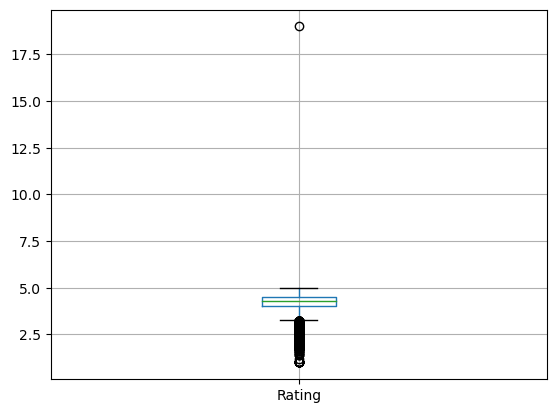

In [5]:
df.boxplot() # sns.boxplot(y=df["Rating"])

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

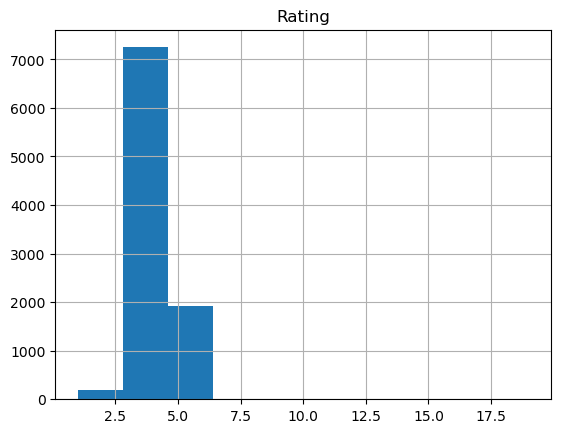

In [6]:
df.hist()

In [7]:
df.info()# to see is there null or not 
# Rating , Current Ver , Android Ver all have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Data Cleaning

In [8]:
# count the number of missing values in each column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
# check how many ratings are more than 5 - outliers-
df[df['Rating']>5]
#df[df['Rating']>5].count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
# remove this (row = 10472) cause it is outlier
df.drop([10472],inplace=True)

In [11]:
df[10471:10473] # to ensure that is deleted

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


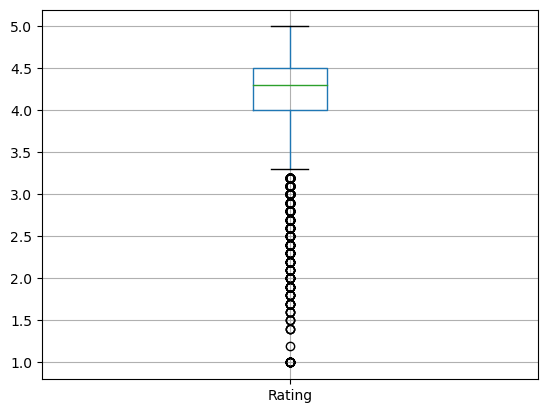

In [12]:
df.boxplot();
# most of the data lie between 4 and 4.5

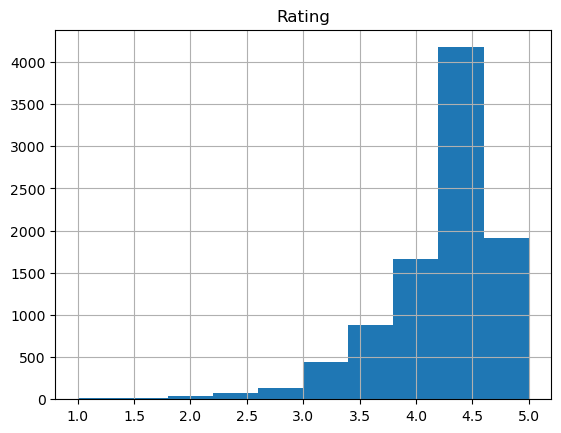

In [13]:
df.hist();#right skewed

In [14]:
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


# Data Imputation and manipulation

In [15]:
# define a function to impute with median not mean cause my data is right skewd
def impute_median(series): # take series as a column
    return series.fillna(series.median()) #fill this column(blank values) with the median

In [16]:
df.Rating = df['Rating'].transform(impute_median)

In [17]:
print(df.isnull().sum())
# now all empty values in Rating column is filled with median

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64


In [18]:
# now fill the missing in categorical values with the mode

In [19]:
print(df['Type'].mode() )        # Free
print(df['Current Ver'].mode() ) # Varies with device
print(df['Android Ver'].mode() ) # 4.1 and up

0    Free
Name: Type, dtype: object
0    Varies with device
Name: Current Ver, dtype: object
0    4.1 and up
Name: Android Ver, dtype: object


In [20]:
# fill the categorical missing value with mode
df['Type'].fillna( str(df['Type'].mode().values[0] ) , inplace = True)
df['Current Ver'].fillna( str(df['Current Ver'].mode().values[0] ) , inplace = True)
df['Android Ver'].fillna( str(df['Android Ver'].mode().values[0] ) ,inplace = True)

In [21]:
print(df.isnull().sum()) # now there is no missing values

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [22]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [23]:
df['Price'].sum() # it's string

'000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$4.99$4.99000000000000000000000000000000000000000000000000000000$4.99$4.99000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$3.99000000000000000000000000000000000000000000000000$3.99$6.99$1.49$2.99$3.99$7.9900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$3.99000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000$3.99$5.99$3.99$3.9900000000000000000000000000000000000000000000000000000000000000000000000000000000

In [24]:
# convert price, Reviews column to numerical data
print(   df['Price'].min()    )
print(   df['Reviews'].min()    )

$0.99
0


In [25]:
#first remove $ 
df['Price'] = df['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x) )

# then convert it to float to be numerical
df['Price'] = df['Price'].apply(lambda x : float(x))

In [26]:
df['Price'].sum() # now it be numerical   

11136.670000000002

In [27]:
df['Reviews'].sum()# need to be numerical to get the sum

'159967875102156449671671783681513791121138808788448294326151855363227194216224399450654769961118192202602031362231120227503510153535648145366391585911171762952212206261745311070858453671598284170571295421047980512914033971534777438846243160902951904021135652530116986137927192073670211977373574994197136142151682155138541421777348250133727880361748066578631433509717542680128818900497901150173932090222543698572964420501041793460136187182301347411371535959315753826834119227722806541849773536418473306638712576229147241857447857755081408024631545406015544641822486203130143511650714332339046886036393496787873175061862208447303190801618584278319161546202133626875177827096451383425271322168027391065233757287885126930105156114341157161296747301254730851853258421773070991100286116589148945445862272894146353127918488073670001598723084718884111622959124034459641495569033161423055190232073721225380837106007435982280805228741621476023243989788080542492286897103755465051144210295159872296293137099151

In [28]:
#convert reviews to numeric,there are 2 ways
df['Reviews'] = df['Reviews'].apply(lambda x : float(x))            # 1          
#df['Reviews'] = pd.to_numeric( df['Reviews'] , errors='coerec')    # 2

In [29]:
df['Reviews'].sum()

4814617393.0

In [30]:
# remove plus sign (+) from installs column
df['Installs'] = df['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))

# remove comma sign (,) from installs column
df['Installs'] = df['Installs'].apply(lambda x : str(x).replace(',','') if ',' in str(x) else str(x))

# then convert it to numerical values
df['Installs'] = df['Installs'].apply(lambda x : float(x) )

In [31]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [32]:
 df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


# Data Visualization

In [70]:
gp = df.groupby('Category')
x = gp['Rating'].agg(np.mean)
y = gp['Price'].agg(np.sum)
z = gp['Reviews'].agg(np.mean)
a = gp['Installs'].agg(np.sum)
print(x,'-----------------------------')
print(y,'-----------------------------')
print(z,'-----------------------------')
print(a,'-----------------------------')

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

# visualize Average Rating per category

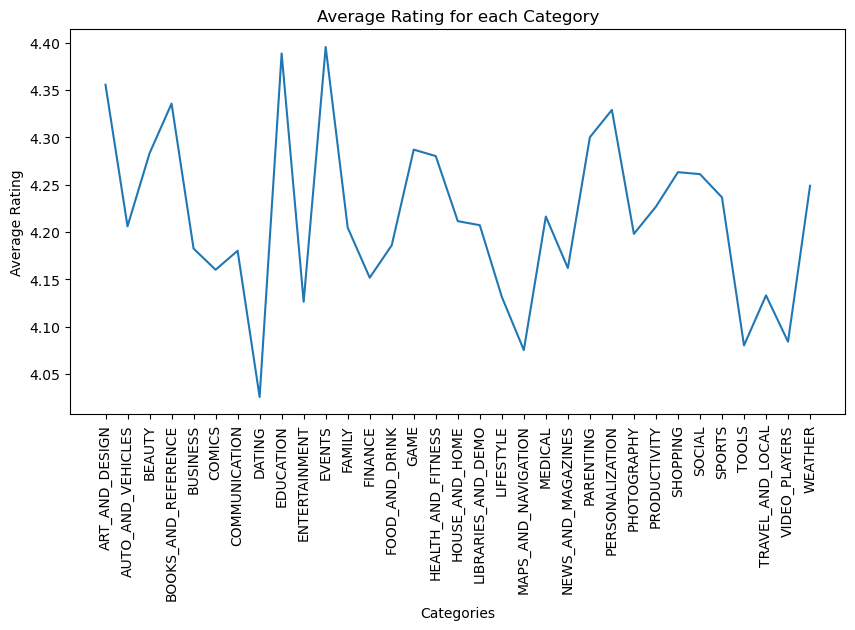

In [44]:
plt.figure( figsize = (10,5) )# to increase the curve size
plt.plot(x ) #,color='r') 
plt.xticks(rotation=90)

plt.title('Average Rating for each Category')
plt.xlabel('Categories')
plt.ylabel('Average Rating')

plt.show()

In [35]:
# now we see education and events category have the highest average rate

# visualize Total Price per category

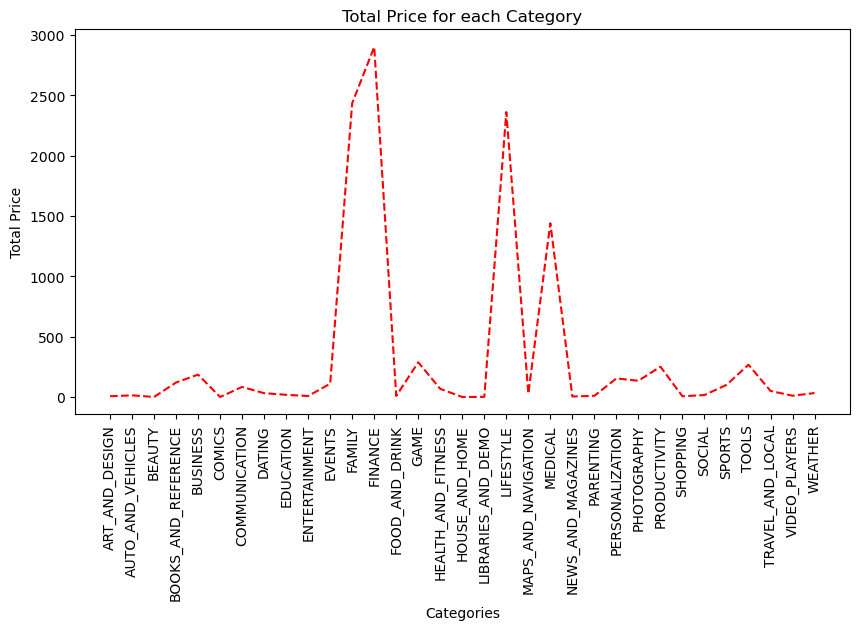

In [46]:
plt.figure( figsize = (10,5) )# to increase the curve size
plt.plot(y , 'r--') #,color='r')
plt.xticks(rotation=90)

plt.title('Total Price for each Category')
plt.xlabel('Categories')
plt.ylabel('Total Price')

plt.show()

In [37]:
# now we see finance and lifestyle category were sold the most

# visualize Reviews Average for each Category

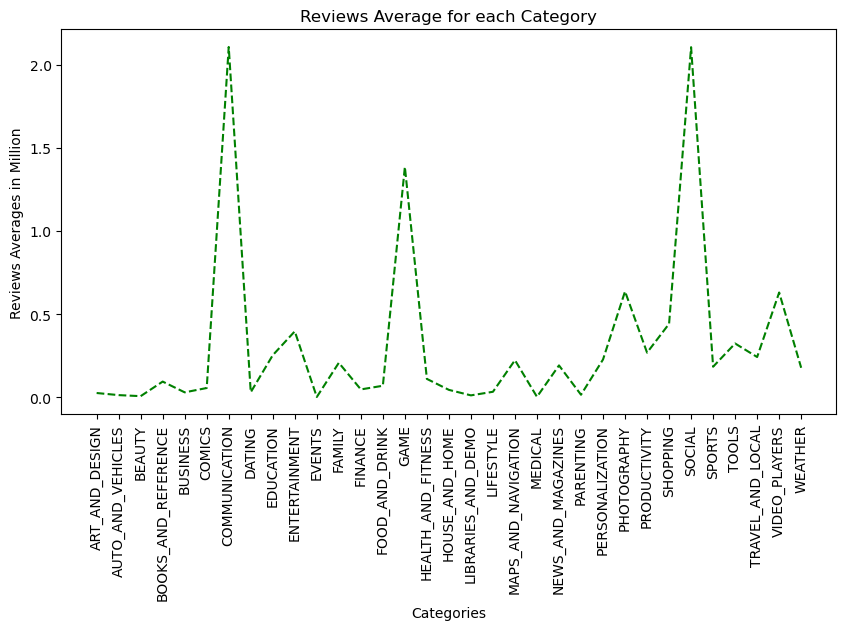

In [71]:
plt.figure( figsize = (10,5) )# to increase the curve size
plt.plot(z/1000000,'g--' ) #,color='r')
plt.xticks(rotation=90)

plt.title('Reviews Average for each Category')
plt.xlabel('Categories')
plt.ylabel('Reviews Averages in Million')

plt.show()

In [39]:
# now we see communication and social category have the highest Reviews average 

# visualize Total Installs for each category 

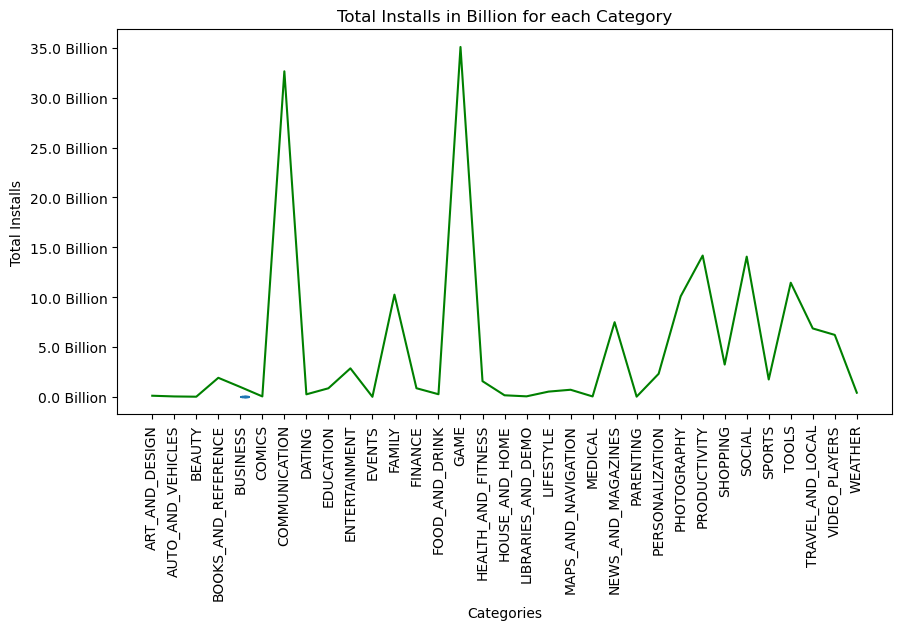

In [48]:
def Billion_formatter(x, pos):
    return "%.1f Billion" % (x/1E9)
fig, ax = plt.subplots(figsize = (10,5))
ax.yaxis.set_major_formatter(Billion_formatter)
ax.plot(x,y)
plt.plot(a,color='g') #,color='g') , 'g--'
plt.xticks(rotation=90)

plt.title('Total Installs in Billion for each Category')
plt.xlabel('Categories')
plt.ylabel('Total Installs')

plt.show()

In [51]:
# communication and game category were installed the most

In [59]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [63]:
gp = df.groupby('Category')

a = gp['Installs'].agg(np.sum).max()
print(a)

35086024415.0


In [64]:
gp = df.groupby('Category')

a = gp['Installs'].agg(np.sum).max()
print(a)

35086024415.0


In [65]:
c=df.groupby('Category')['Installs'].agg(np.sum).max()
print(c)

35086024415.0
